## Example 1

In [1]:
library(httr)

url = "https://omabrowser.org/api/protein/P53_RAT/"
response = GET(url)

response_content_list = httr::content(response, as = "parsed")


## Example 2


In [1]:
library(OmaDB)

sequence <- 'MKLVFLVLLFLGALGLCLAGRRRSVQWCAVSQPEATKCFQWQRNMRKVRGPPVSCIKRDSPIQCIQAIAENRADAVTLDGGFIYEAGLAPYKLRPVAAEVYGTERQPRTHYYAVAVVKKGGSFQLNELQGLKSCHTGLRRTAGWNVPIGTLRPFLNWTGPPEPIEAAVARFFSASCVPGADKGQFPNLCRLCAGTGENKCAFSSQEPYFSYSGAFKCLRDGAGDVAFIRESTVFEDLSDEAERDEYELLCPDNTRKPVDKFKDCHLARVPSHAVVARSVNGKEDAIWNLLRQAQEKFGKDKSPKFQLFGSPSGQKDLLFKDSAIGFSRVPPRIDSGLYLGSGYFTAIQNLRKSEEEVAARRARVVWCAVGEQELRKCNQWSGLSEGSVTCSSASTTEDCIALVLKGEADAMSLDGGYVYTAGKCGLVPVLAENYKSQQSSDPDPNCVDRPVEGYLAVAVVRRSDTSLTWNSVKGKKSCHTAVDRTAGWNIPMGLLFNQTGSCKFDEYFSQSCAPGSDPRSNLCALCIGDEQGENKCVPNSNERYYGYTGAFRCLAENAGDVAFVKDVTVLQNTDGNNNEAWAKDLKLADFALLCLDGKRKPVTEARSCHLAMAPNHAVVSRMDKVERLKQVLLHQQAKFGRNGSDCPDKFCLFQSETKNLLFNDNTECLARLHGKTTYEKYLGPQYVAGITNLKKCSTSPLLEACEFLRK'
seq_annotation = mapSequence(query = sequence)

seq_annotation$targets[[1]]$canonicalid          # 'TRFL_HUMAN'

hog_id <- seq_annotation$targets[[1]]$oma_hog_id   # ’HOG:0413862.1a.1b'
hog <- getHOG(id = hog_id, members = TRUE, level = 'Mammalia')
hog$members

Loading required package: httr
Loading required package: plyr



[1] "TRFL_HUMAN"

entry_nr,entry_url,omaid,canonicalid,sequence_md5,oma_group,oma_hog_id,chromosome,locus.start,locus.end,locus.strand,is_main_isoform
7640319,https://omabrowser.org/api/protein/7640319/,PROCA07246,ENSPCAG00000006792,2571efda7dca4befb7e408bfdfc15ad3,827039,HOG:0413862.1a.1b,GeneScaffold_2543,10804,43578,-1,TRUE
7663896,https://omabrowser.org/api/protein/7663896/,LOXAF14821,G3T0S5,52f60becab0a8a9d9f96ff4ab5fa021a,827039,HOG:0413862.1a.1b,scaffold_12,21054758,21082975,1,TRUE
7699387,https://omabrowser.org/api/protein/7699387/,RABIT12763,G1TFW8,e06dab0231451db6cc30b3a73838680a,827039,HOG:0413862.1a.1b,9,14592884,14612803,-1,TRUE
7707357,https://omabrowser.org/api/protein/7707357/,OCHPR01366,ENSOPRG00000011198,14ca2f664b13300ed911c6468647efbb,827039,HOG:0413862.1a.1b,GeneScaffold_647,999,20830,-1,TRUE
7738458,https://omabrowser.org/api/protein/7738458/,FUKDA00881,ENSFDAG00000018870.1,acb471e079f634a33e8b6770af0a3944,827039,HOG:0413862.1a.1b,scaffold_KN122104,14136787,14157491,1,TRUE
7776719,https://omabrowser.org/api/protein/7776719/,CAVPO15803,ENSCPOG00000010905,10e521c3b6a394610ef91a3acd1b1a89,827039,HOG:0413862.1a.1b,scaffold_7,47209565,47227495,-1,TRUE
7785995,https://omabrowser.org/api/protein/7785995/,CHILA06139,ENSCLAG00000016651.1,efc910eab371f5defea154c936eed209,827039,HOG:0413862.1a.1b,scaffold_JH721880,25580509,25604108,1,TRUE
7824662,https://omabrowser.org/api/protein/7824662/,OCTDE19528,ENSODEG00000010708.1,d4c8f5bf446d54e166eaa776c0e23609,827039,HOG:0413862.1a.1b,scaffold_JH651641,4395383,4418907,-1,TRUE
7910438,https://omabrowser.org/api/protein/7910438/,MOUSE53077,TRFL_MOUSE,5a7301a6af577855c7647c3eb7755246,827039,HOG:0413862.1a.1b,9,111019326,111042182,1,TRUE
7933439,https://omabrowser.org/api/protein/7933439/,RATNO20342,D3ZAB1,3e3417eba34b37a11c039a3f47d89a17,827039,HOG:0413862.1a.1b,8,119290454,119312668,1,TRUE


In [2]:
hog <- getHOG(id = 'TRFL_HUMAN', members = TRUE, level = 'Mammalia')

ontologies <- getProtein(hog$members$omaid, attribute = 'gene_ontology')

In [2]:
bgHOG <- getHOG(id = 'TRFL_HUMAN', members = TRUE, level = 'Eukaryota') 
bgOntologies <- getProtein(bgHOG$members$omaid, attribute = 'gene_ontology')

Warning message in split.default(body_decoded, rep(1:n_requests, each = 100)):
“data length is not a multiple of split variable”

In [6]:
bgOntologiesFormatted = formatTopGO(bgOntologies, format = 'geneID2GO')

library(topGO)
myGO <- getTopGO(annotations = bgOntologiesFormatted, format = 'geneID2GO',  
    foregroundGenes = hog$members$entry_nr, ontology = 'BP')
myRes <- runTest(myGO, algorithm = 'classic', statistic = 'fisher')
print(GenTable(myGO, myRes))


Building most specific GOs .....
	( 77 GO terms found. )

Build GO DAG topology ..........
	( 545 GO terms and 1185 relations. )

Annotating nodes ...............
	( 227 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 361 nontrivial nodes
		 parameters: 
			 test statistic: fisher


        GO.ID                                        Term Annotated Significant
1  GO:0001501                 skeletal system development        39          39
2  GO:0001503                                ossification        39          39
3  GO:0001649                  osteoblast differentiation        39          39
4  GO:0001816                         cytokine production        39          39
5  GO:0001817           regulation of cytokine production        39          39
6  GO:0001818 negative regulation of cytokine producti...        39          39
7  GO:0002237    response to molecule of bacterial origin        39          39
8  GO:0002682         regulation of immune system process        39          39
9  GO:0002683 negative regulation of immune system pro...        39          39
10 GO:0002761 regulation of myeloid leukocyte differen...        39          39
   Expected result1
1       6.7  <1e-30
2       6.7  <1e-30
3       6.7  <1e-30
4       6.7  <1e-30
5       6.7  <1e-30


## Example 3

In [10]:
library(OmaDB)

tax = getTaxonomy(root = 'Hominoidea')

library(ggtree)

tree = getTree(tax$newick)

mytree = ggtree(tree) 

labels <- tree$tip.label


In [17]:

labelsFormatted = sapply(labels, FUN = function(x) gsub("_", " ", x, fixed = TRUE))
                         
library(rphylopic)

ids = sapply(labelsFormatted, FUN = function(x) name_search(x)$canonicalName[1,1])
             


Loading required package: ggimage
Loading required package: ggplot2


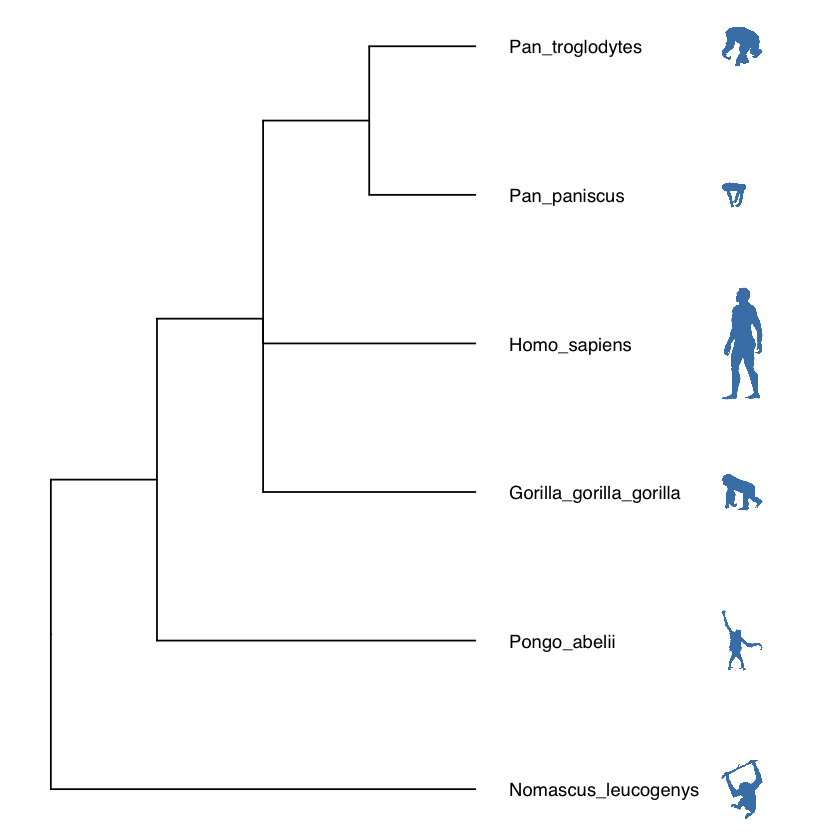

In [21]:
images = sapply(as.character(ids), FUN = function(x) tryCatch(name_images(x)$same[[1]]$uid, error = function(w) name_images(x)$supertaxa[[1]]$uid))

d <- data.frame(label = labels, images = as.character(images))

library(dplyr)
library(ggimage)                                                            

mytree %<+% d + geom_tiplab(aes(image=images), geom="phylopic", offset = 2.3, color='steelblue') + geom_tiplab(offset = 0.3) + ggplot2::xlim(0, 7)


## Example 4

In [ ]:
library(OmaDB)

mouse = getGenome(id='Mus musculus')$taxon_id
human = getGenome(id='Homo sapiens')$taxon_id
dog = getGenome(id='Canis lupus familiaris')$taxon_id

human_mouse = getGenomePairs(genome_id1 =human, genome_id2 = mouse, per_page = "all", rel_type="1:1")

human_dog = getGenomePairs(genome_id1 =human, genome_id2 = dog, per_page = "all", rel_type="1:1")

human_mouse$Species  = 'Mus musculus'
human_dog$Species = 'Canis lupus familiaris'

all_pairs = rbind(human_mouse,human_dog)
all_pairs$Species = as.factor(all_pairs$Species)
library(ggplot2)

g <- ggplot(all_pairs, aes(x = 'evolutionary distance [PAM]', fill = Species)) + geom_density(alpha = 0.5) + theme(legend.position="bottom",panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
dev.off()

print(g)

ks.test(human_dog$distance,human_mouse$distance) 


## Example 5

In [ ]:
# Our mystery sequence is cystic fibrosis transmembrane conductance
# regulator in the Emperor penguin (UniProt ID: A0A087RGQ1_APTFO)
mysterySeq <- 'FFFLLRWTKPILRKGYRRRLELSDIYQIPSADSADNLSEKLEREWDRELATSKKKPKLINALRRCFFWKFMFYGIILYLGEVTKSVQPLLLGRIIASYDPDNSDERSIAYYLAIGLCLLFLVRTLLIHPAIFGLHHIGMQMRIAMFSLIYKKILKLSSRVLDKISTGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLLWDMLEASAFSGLAFLIVLAFFQAWLGQRMMKYRNKRAGKINERLVITSEIIENIQSVKAYCWEDAMEKMIESIRETELKLTRKAAYVRYFNSSAFFFSGFFVVFLAVLPYAVIKGIILRKIFTTISFCIVLRMTVTRQFPGSVQTWYDSIGAINKIQDFLLKKEYKSLEYNLTTTGVELDKVTAFWDEGIGELFVKANQENNNSKAPSTDNNLFFSNFPLHASPVLQDINFKIEKGQLLAVSGSTGAGKTSLLMLIMGELEPSQGRLKHSGRISFSPQVSWIMPGTIKENIIFGVSYDEYRYKSVIKACQLEEDISKFPDKDYTVLGDGGIILSGGQRARISLARAVYKDADLYLLDSPFGHLDIFTEKEIFESCVCKLMANKTRILVTSKLEHLKIADKILILHEGSCYFYGTFSELQGQRPDFSSELMGFDSFDQFSAERRNSILTETLRRFSIEGEGTGSRNEIKKQSFKQTSDFNDKRKNSIIINPLNASRKFSVVQRNGMQVNGIEDGHNDPPERRFSLVPDLEQGDVGLLRSSMLNTDHILQGRRRQSVLNLMTGTSVNYGPNFSKKGSTTFRKMSMVPQTNLSSEIDIYTRRLSRDSVLDITDEINEEDLKECFTDDAESMGTVTTWNTYFRYVTIHKNLIFVLILCVTVFLVEVAASLAGLWFLKQTALKANTTQSENSTSDKPPVIVTVTSSYYIIYIYVGVADTLLAMGIFRGLPLVHTLITVSKTLHQKMVHAVLHAPMSTFNSWKAGGMLNRFSKDTAVLDDLLPLTVFDFIQLILIVIGAITVVSILQPYIFLASVPVIAAFILLRAYFLHTSQQLKQLESEARSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVVFFVAVAFISIVTTGDGSGKVGIILTLAMNIMGTLQWAVNSSIDVDSLMRSVGRIFKFIDMPTEEMKNIKPHKNNQFSDALVIENRHAKEEKNWPSGGQMTVKDLTAKYSEGGAAVLENISFSISSGQRVGLLGRTGSGKSTLLFAFLRLLNTEGDIQIDGVSWSTVSVQQWRKAFGVIPQKVFIFSGTFRMNLDPYGQWNDEEIWKVAEEVGLKSVIEQFPGQLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTSQVIRKTLKHAFANCTVILSEHRLEAMLECQRFLVIEDNKLRQYESIQKLLNEKSSFRQAISHADRLKLLPVHHRNSSKRKPRPKITALQEETEEEVQETRL'
myAnnotations <- getAnnotation(mysterySeq)


## Example 6

In [3]:
BiocManager::install("BgeeDB")
library(BgeeDB)
library(OmaDB)

# Bgee uses Ensembl gene IDs, obtainable using OmaDB’s cross-references.
trfl_xrefs <- getProtein(id='TRFL_HUMAN')$xref
trfl_ens_id <- subset(trfl_xrefs, source == 'Ensembl Gene')$xref
# The Ensembl gene IDs need to be without version suffix
trfl_ens_id <- strsplit(trfl_ens_id,'.',fixed=TRUE)[[1]][1]

my_stage <- 'UBERON:0034920' # Entire span of an organism's life
bgee.expr <- Bgee$new(species='Homo_sapiens')
expr.data <- loadTopAnatData(bgee.expr, stage = my_stage)
gene.expr.tissue.ids <- 
    unlist(expr.data$gene2anatomy[trfl_ens_id], use.names = F)
tissues <- expr.data$organ.names
print(tissues[tissues$ID %in% gene.expr.tissue.ids, ])


Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'BgeeDB'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'backports', 'callr', 'ddalpha', 'httpuv', 'httr',
  'jsonlite', 'knitr', 'markdown', 'pillar', 'readr', 'readxl', 'rmarkdown'
Loading required package: httr

Attaching package: ‘httr’

The following object is masked from ‘package:Biobase’:

    content

Loading required package: plyr

Attaching package: ‘plyr’

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename

The following object is masked from ‘package:graph’:

    join




NOTE: You did not specify any data type. The argument dataType will be set to c("rna_seq","affymetrix","est","in_situ") for the next steps.

Querying Bgee to get release information...

Building URL to query species in Bgee release 14_0...

Submitting URL to Bgee webservice... (https://r.bgee.org/?page=r_package&action=get_all_species&display_type=tsv&source=BgeeDB_R_package&source_version=2.8.0)

Query to Bgee webservice successful!

API key built: b26f69b20aad19a4156827bebf48a3b3986bb615da97dc402ac9beaa617824e5639c71d693e7bba95fbf394006a299d96296ca80ca937d6d5c63ad1aefc20aed

Building URLs to retrieve organ relationships from Bgee.........
   URL successfully built (https://r.bgee.org/?page=r_package&action=get_anat_entity_relations&display_type=tsv&species_list=9606&attr_list=SOURCE_ID&attr_list=TARGET_ID&api_key=b26f69b20aad19a4156827bebf48a3b3986bb615da97dc402ac9beaa617824e5639c71d693e7bba95fbf394006a299d96296ca80ca937d6d5c63ad1aefc20aed&source=BgeeDB_R_package&source_version=2.8.